In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
root_dir = "drive/My Drive/" 
base_dir = root_dir + 'fastai-v3/' 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
%matplotlib inline
#from fastai import *
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [7]:
n=100

In [10]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1) 
# all of the first column to be given a number between -1 and 1
x[:5]

tensor([[-0.4339,  1.0000],
        [ 0.9222,  1.0000],
        [-0.8994,  1.0000],
        [-0.9720,  1.0000],
        [-0.8714,  1.0000]])

In [11]:
a = tensor(3.,2); a

# rank means how many axis are there
# in image it has 3
# here it is rank 1 vector

tensor([3., 2.])

In [13]:
y = x@a + 0.25*torch.rand(n)

# its a vector product between x and a
# torch.rand is the noise

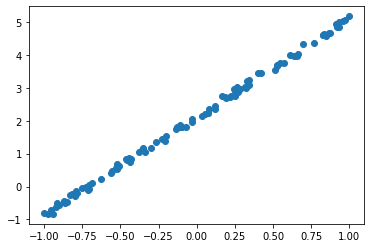

In [14]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [15]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [16]:
a = tensor(-1.,1)
# creating a tensor a

In [17]:
y_hat = x@a
# using this a to predict the y

mse(y_hat, y)

tensor(6.5355)

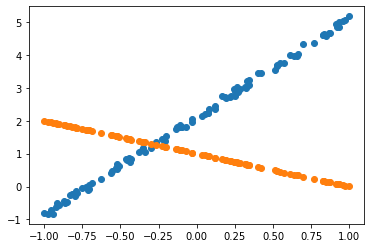

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [19]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [20]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() # this will calculate thte gradient
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [21]:
lr = 1e-1
for t in range(100): update()

tensor(6.5355, grad_fn=<MeanBackward0>)
tensor(1.3410, grad_fn=<MeanBackward0>)
tensor(0.3137, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0214, grad_fn=<MeanBackward0>)
tensor(0.0085, grad_fn=<MeanBackward0>)
tensor(0.0056, grad_fn=<MeanBackward0>)
tensor(0.0049, grad_fn=<MeanBackward0>)
tensor(0.0047, grad_fn=<MeanBackward0>)
tensor(0.0047, grad_fn=<MeanBackward0>)


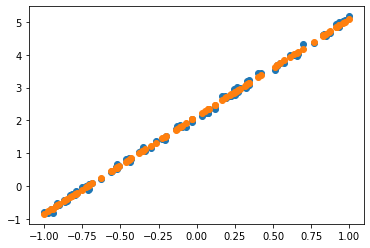

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animate it!

In [23]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [24]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.